# Machine Learning & Statistics Project 2019

## Declan Reidy G00364690

### November 2019

In [1]:
import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_boston

%matplotlib inline

Using TensorFlow backend.


This project concerns the well-known Boston House Prices dataset. The project in this Jupyter Notebook is my attempt to describe the dataset firstly with descriptive statistics, then inferential statistics and finally build a neural network to accurately predict the target variable of the dataset, the median house price.

Intitially we will walk through loading the dataset and confirming we are working on the correct dataset. Quickly we will move on to Section 1 describing the dataset by understanding the distribution of the median house price and use some descriptive statistics as well as a correlation matrix to idenify which variables have the greatest correlation to our target variable. We will use the results of the correlation matrix to plot the distributions of the most heavily correlated variables. Performing a linear regression on each variable will aid in confirming by visualisation that each variable is heavily correlated to the target variable. For completeness we will confirm that the others are not.

Section 2 we will use inferential statistics to analyse the dataset. Firstly we will look at locations next to Charles river versus those that are not. Then using the 3 feature variables of strongest correlation to the target variable indicated in Section 1 we can perform an ANOVA to analyse the median house price.


Finally in Section 3 we can build, train and tune our neural network to predict the median house price of the different areas and compare this to the data we hold in the target variable.



# Getting started
## Validate the dataset

In [2]:
#Set parameters for all displays within the notebook

plt.rcParams['figure.figsize'] = (10, 10)
sns.set(rc={'figure.figsize':(10,10)})


Importing the Boston House Prices dataset into Jupyter notebook from scikit-learn library. Note this comes in with the target variable separate. Simply printing out the feature variable set will not be enough to validate what we need so we'll seek to print out the target variable and print it in the same dataframe.

In [3]:
boston_dataset = load_boston()

#check out the keys of the dataset so we can build our pandas dataframe
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Print a preview of the dataset to ensure it is as expected. Note that median house price value is not included under feature names as it is the target variable.

In [4]:
#check out the data section and note the target variable is missing as suspected
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Verify that 'target' key is in fact the target variable that we expect.

In [5]:
#Check if the target variable Median Value MEDV is represented by target as suspected.
boston['MEDV'] = boston_dataset.target
boston['MEDV'].head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64



Append the target variable to our dataframe to allow easier comparisons later.

In [6]:
#Using the assign function add the target variable to our dataframe.
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston = boston.assign(MEDV = boston_dataset.target)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Verify that the dataset matches that from our back up csv file 'Boston House Prices'

In [7]:
#Compare with our CSV dataset and display the first 5 rows of the dataset.

df = pd.read_csv("BostonHousePrices.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



# Section 1
## Describe the dataset

A good place to start is by describing the dataset and getting some descriptive statistics. Transposing the dataframe will make it more readable. We can see all 506 entries are present in the dataset to begin with. We can see the max median house price has been capped to 50, or $50,000. At this point we can confirm the suspicion that the housing market from 1978 is not reflective of that which we experience today, but we can assume the dataset is still statistically relevant.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Descriptive statistics will only bring us some of the way to finding what variables are important. Next we can put the target variable data into a distribution plot to check it's distribution. We can see below that it is normally distributed.

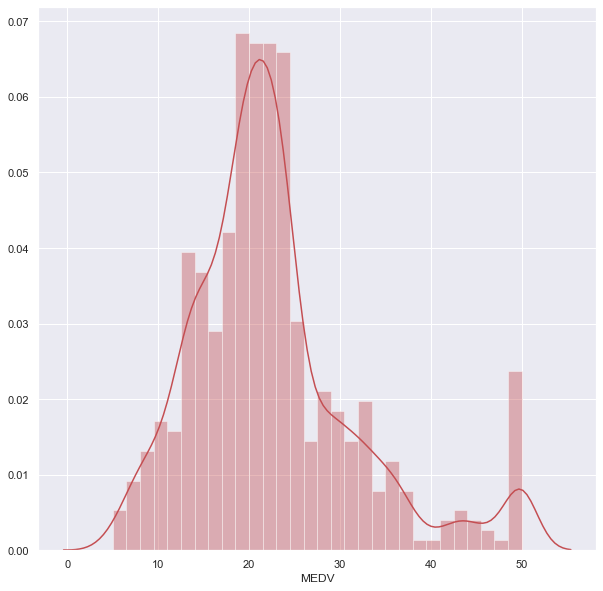

In [9]:

#Shows normal distribution more or less
sns.distplot(boston['MEDV'], bins=30,color="r")

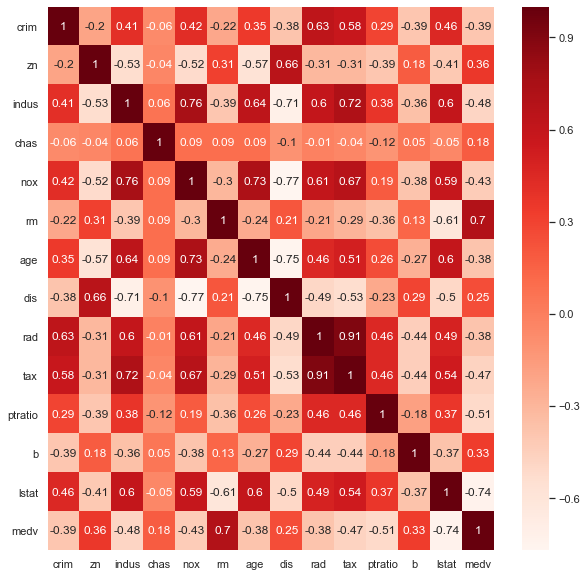

In [10]:
#check which variables are correlated to MEDV positively or negatively.
correlation_matrix = df.corr().round(2) #tidy up the output
sns.heatmap(data=correlation_matrix,annot=True,cmap="Reds")
plt.yticks(rotation=0) #rotate the labels for y to make them readable

# fix for bug that cuts off top/bottom of seaborn plot
#https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Using a correlation matrix and plotting using a heatmap we can see the strongest positive correlation between the median value of the property (MEDV) is the number of rooms (RM) at 0.7. The strongest negative correlation is between MEDV and the percentage of lower status of the population (LSTAT) at -0.74. We can also note that the student to teacher ratio (PTRATIO) is the only other feature variable above +/-0.5, at -0.51.

We should use feature variables which correlate as strongly as possible to the target variable for Linear regression modelling. 

When training our network later we should check for multi-co-linearity and avoid using pairs strongly correlated to each other. Examples of a positively correlated pair (0.91) is Index of accessibility to radial highways (RAD) and Full-value property tax rate per $10,000 (TAX). Similarly an example of a negatively correlated pair (-0.75) is Weighted distances to five Boston employment centers (DIS) and Proportion of owner-occupied units built prior to 1940 (AGE) 

Next we can look at selected feature variables in isolation and confirm strong correlations for later in the analysis.

In [11]:
feature_var = ['rm', 'ptratio', 'lstat','medv']
df[feature_var].corr().round(2)

,rm,ptratio,lstat,medv
rm,1.00,-0.36,-0.61,0.70
ptratio,-0.36,1.00,0.37,-0.51
lstat,-0.61,0.37,1.00,-0.74
medv,0.70,-0.51,-0.74,1.00


Checking the distribution of the most heavily correlated feature variables confirms that they are RM and LSTAT are very much normally distributed whilst the 

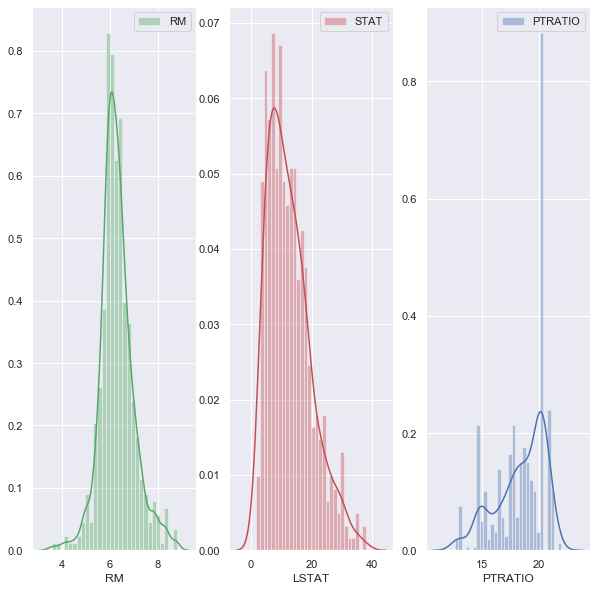

In [12]:
fig, ax = plt.subplots(1, 3)
#t = ax[0]=plt.hist([boston['MEDV'],boston['RM'],boston['LSTAT'],boston['PTRATIO']], bins=30, color=["r","k","g","b"], label=["MEDV","RM","LSTAT","PTRATIO"])
#t.legend()
r = sns.distplot(boston['RM'], bins=30, color="g", ax=ax[0], label=["RM"])
r.legend()
l= sns.distplot(boston['LSTAT'], bins=30, color="r", ax=ax[1], label=["STAT"])
l.legend()
l= sns.distplot(boston['PTRATIO'], bins=30, color="b", ax=ax[2], label=['PTRATIO'])
l.legend()

Moving forward it is a logical assumption we must use average number of rooms (rm) and percentage of lower status of the population (lstat) as part of our neural network to best approximate the median house price. The third feature variable of student to teacher ratio also appears to be normally distributed but we can be far less conclusive about that.

Let's look at the descriptive statistics of the dataset again but only for our three feature variables that look the most promising by way of their correlation.

In [13]:

#Select feature variables based on correlation above
feature_var = ['rm', 'lstat', 'ptratio', 'medv'] #take out similar rad/tax, dis/age
df[feature_var].describe().T


,count,mean,std,min,25%,50%,75%,max
rm,506.0,6.284634,0.702617,3.561,5.8855,6.2085,6.6235,8.78
lstat,506.0,12.653063,7.141062,1.730,6.9500,11.3600,16.9550,37.97
ptratio,506.0,18.455534,2.164946,12.600,17.4000,19.0500,20.2000,22.00
medv,506.0,22.532806,9.197104,5.000,17.0250,21.2000,25.0000,50.00


We can also isolate these variables from our correlation matrix and show in a more explicit way the correlation between the 3 feature variables and the median house price.

In [14]:
#Now just correlate the chosen variables (large numbers show high correlation)
df[feature_var].corr()

,rm,lstat,ptratio,medv
rm,1.000000,-0.613808,-0.355501,0.695360
lstat,-0.613808,1.000000,0.374044,-0.737663
ptratio,-0.355501,0.374044,1.000000,-0.507787
medv,0.695360,-0.737663,-0.507787,1.000000


If we were to then plot these three variables using a pair plot we can see we have found highly correlated variables. This is a promising sign for later in our project.

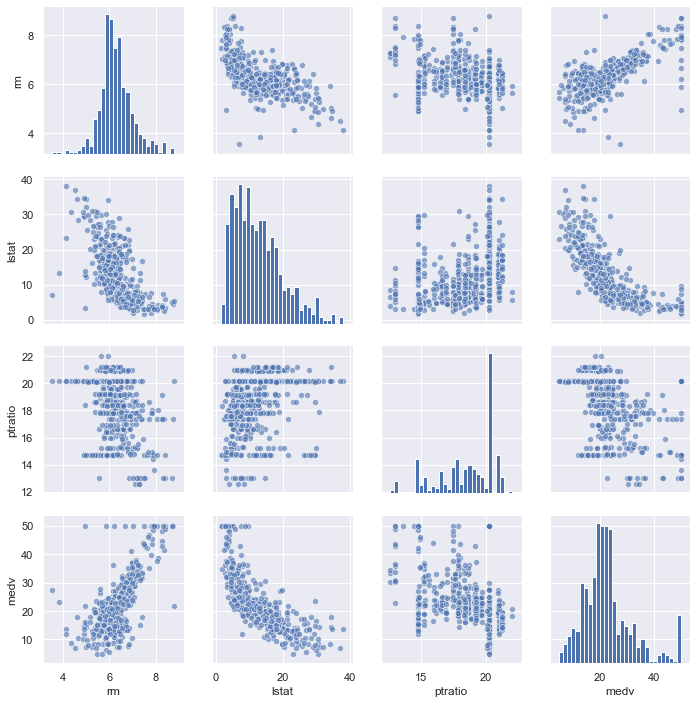

In [15]:
#pair plotting the feature variables
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(df[feature_var], plot_kws={'alpha':0.6}, diag_kws={'bins':30})

Based on the pair plot we can again see that the two most promising linear correlations are RM and LSTAT. For some context it does appear likely that the number of rooms would be positively correlated to the median price of the house. Similarly, it seems logical given what we empirically know now about those of the same socio economic groups tending towards one another, that LSTAT would be inversely correlated to the median house price. Finally, it is also logical that PRATIO would be positively correlated given the weight it is likely to be given by prospective buyers in any era.

Let's plot the three feature variables separately with regression lines to further validate the 3 (or more) variables with the best fit. As we can see from the chosen three variables the data points are clustered close to the regression line. We can take this opportunity to plot each of the variables (not CHAS as it is binary), just to assure ourselves of no hidden positive correlations.

Plotting regression lines for Number of Rooms 'RM' , Percentage Lower Status 'LSTAT' and Pupil to Teacher ratio 'PRATIO'

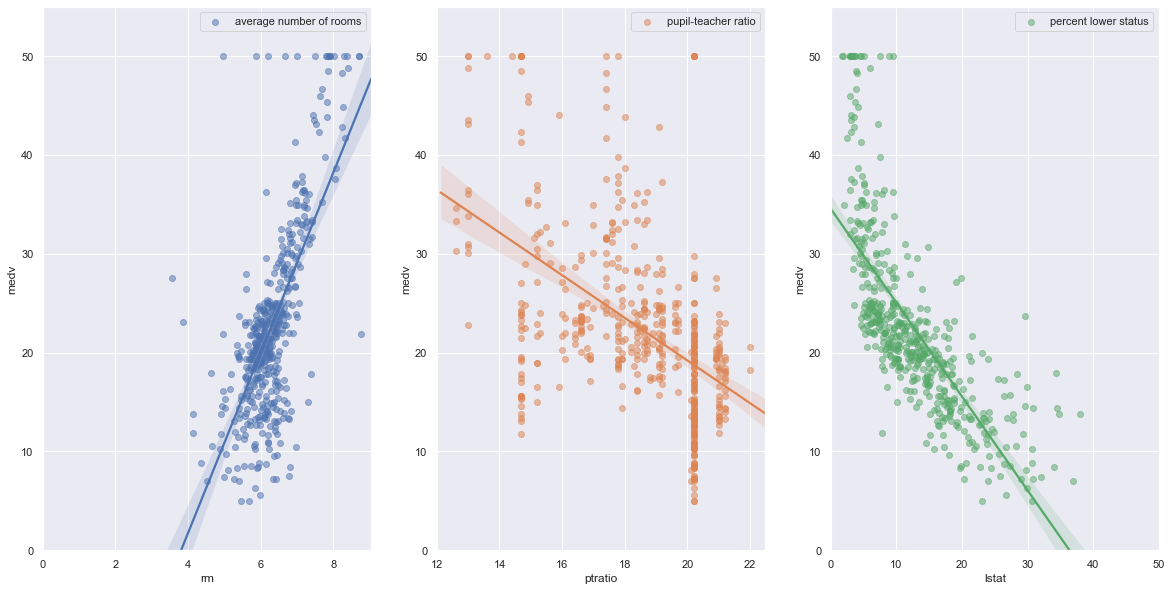

In [16]:
#Use Seaborn instead of matplotlib for best fit line 
#https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)

rm = sns.regplot('rm', 'medv', df, ax=ax[0], label='average number of rooms', scatter_kws={'alpha': 0.5})
rm.set(ylim=(0, 55))
rm.set(xlim=(0, None))
rm.legend()

ptr = sns.regplot('ptratio', 'medv', df, ax=ax[1], label='pupil-teacher ratio', scatter_kws={'alpha': 0.5})
ptr.set(ylim=(0, 55))
ptr.set(xlim=(12, None))
ptr.legend()

lst = sns.regplot('lstat', 'medv', df, ax=ax[2], label='percent lower status', scatter_kws={'alpha': 0.5})
lst.set(ylim=(0, 55))
lst.set(xlim=(0, 50))
lst.legend()



Plotting regression lines for Crime rate 'CRIM' , Residential zoning 'ZN' and Age of the property 'AGE'

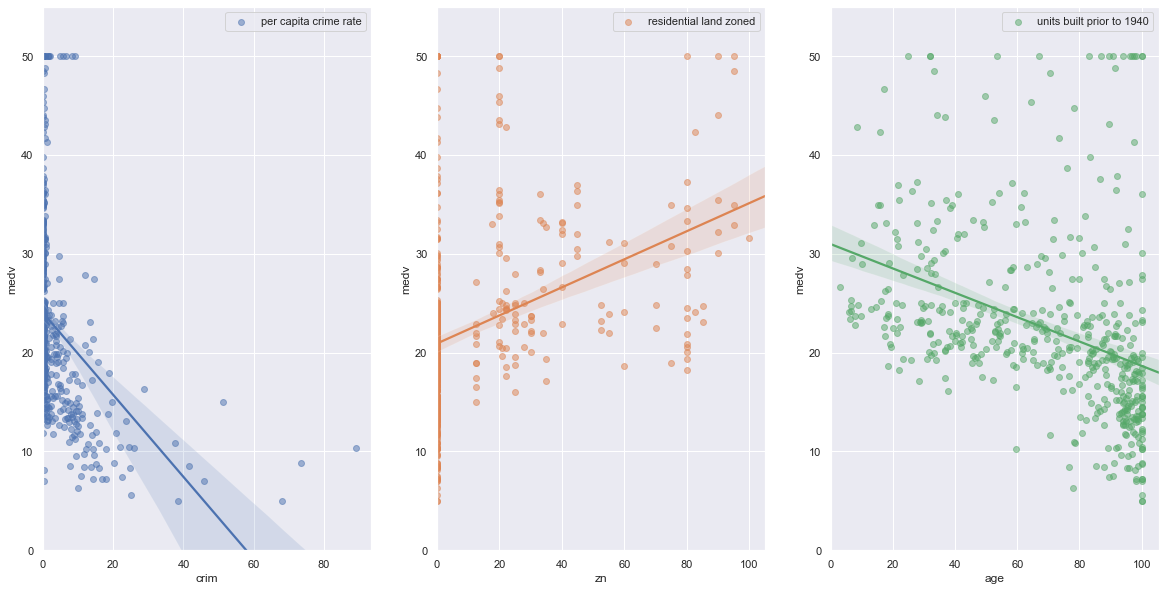

In [17]:
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)

crim = sns.regplot('crim', 'medv', df, ax=ax[0], label='per capita crime rate', scatter_kws={'alpha': 0.5})
crim.set(ylim=(0, 55))
crim.set(xlim=(0, None))
crim.legend()

zn = sns.regplot('zn', 'medv', df, ax=ax[1], label='residential land zoned', scatter_kws={'alpha': 0.5})
zn.set(ylim=(0, 55))
zn.set(xlim=(0, None))
zn.legend()

age = sns.regplot('age', 'medv', df, ax=ax[2], label='units built prior to 1940', scatter_kws={'alpha': 0.5})
age.set(ylim=(0, 55))
age.set(xlim=(0, None))
age.legend()





Plotting regression lines for Distance to employment centres 'DIS' , Accesibility to radial highways 'RAD' and property tax rates 'TAX'

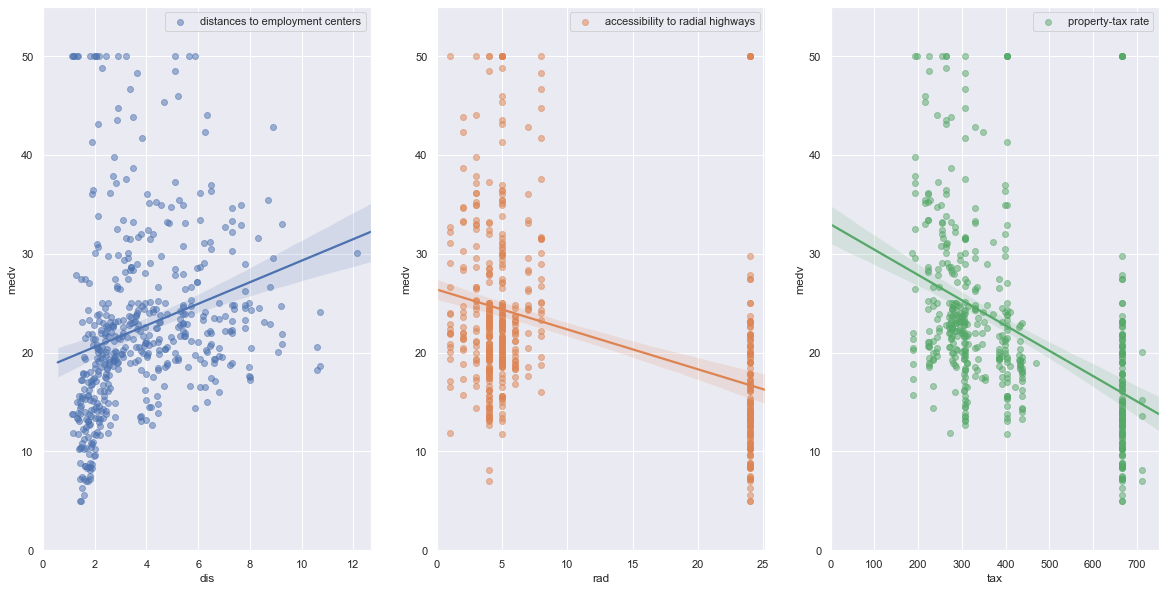

In [18]:
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)

dis = sns.regplot('dis', 'medv', df, ax=ax[0], label='distances to employment centers', scatter_kws={'alpha': 0.5})
dis.set(ylim=(0, 55))
dis.set(xlim=(0, None))
dis.legend()

rad = sns.regplot('rad', 'medv', df, ax=ax[1], label='accessibility to radial highways', scatter_kws={'alpha': 0.5})
rad.set(ylim=(0, 55))
rad.set(xlim=(0, None))
rad.legend()

tax = sns.regplot('tax', 'medv', df, ax=ax[2], label='property-tax rate', scatter_kws={'alpha': 0.5})
tax.set(ylim=(0, 55))
tax.set(xlim=(0, None))
tax.legend()



We can validate from the above that the three feature variables we are looking at have the best fit of all and should remain the focus of our concentration.

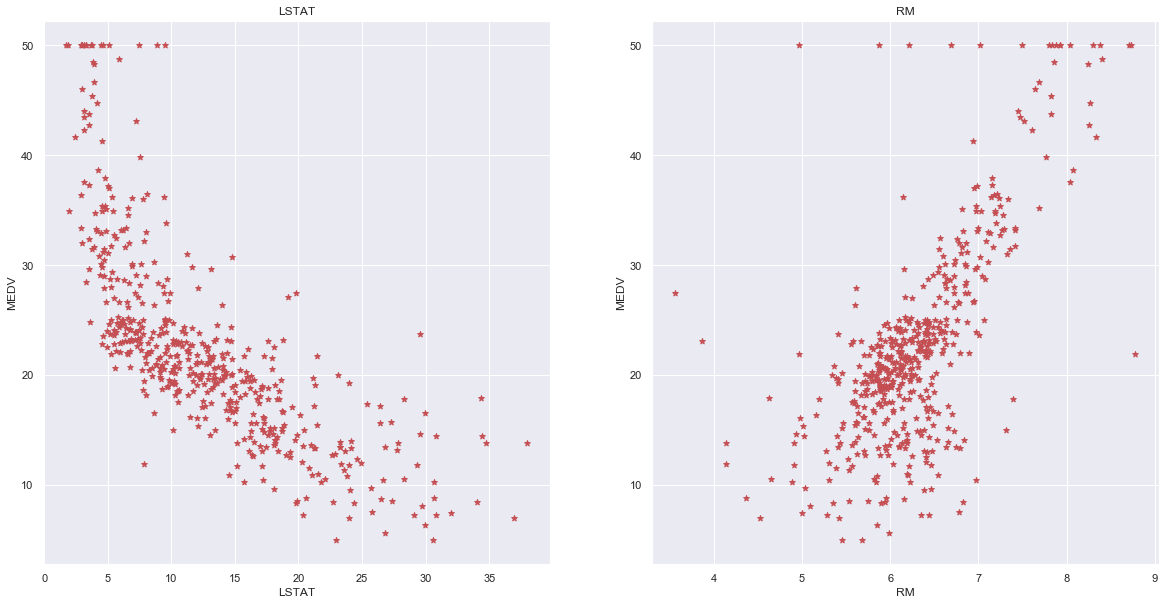

In [19]:
#Borrowed plot, manipulate this. Simple for loop using enumerate and len(data) & subplots
plt.figure(figsize=(20, 10))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='*', color="r")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Section 2
## Charles River compared to non Charles River

In Section 2 we will use inferential statistics to anaylse the dataset. The aim of the section is to determine whether there is a material difference in the median house price for the areas on the Charles river in Boston and those that are not on the river. The starting point for this is to isolate the houses on the Charles river from those not on the Charles river. Using the feature variable CHAS we can determine from 0 or 1 whether a house is on the river or not. 

Below is the description of the sub dataframe for Charles river 'CR'  and the Non Charles river 'NCR'

In [20]:
#Charles River stats
CR = df['medv'][df['chas'] == 1]
CR.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: medv, dtype: float64

In [21]:
#Non Charles River stats
NCR = df['medv'][df['chas'] == 0]
NCR.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: medv, dtype: float64

We can see from the descriptive statistics that the mean house price is higher by the river 28.44, than compared with away from the river 22.09. The median house price however is slightly closer with 23.3 on the river and 20.9 away from the river. The count of the NCR locations in comparison to the CR locations is overwhelming in terms of magnitude. The standard deviation is higher for the CR locations and potentially hiding a trend in the data that is not immediately obvious. This is very unlikely given the min, lower quartile, median, upper quartile and max all indicate a higher median house price in the CR versus the NCR.

Plotting the data as a combined boxplot/swarm plot below gives an indication of what we expect to see from our inferential statisitcs. While there are fewer locations classified as CR versus NCR we can see from the plot that there is heavy concentration around the median and within the 25% to 75% quartiles to indicate the data is not skewed by the locations capped at $50,000.

Plotting NCR and CR side by side we can see the difference in the median is not enormously sigificant but nonetheless for house prices between approximately $5,000 and $50,000 a median difference of $2,400 between the CR and NCR is statistically significant.

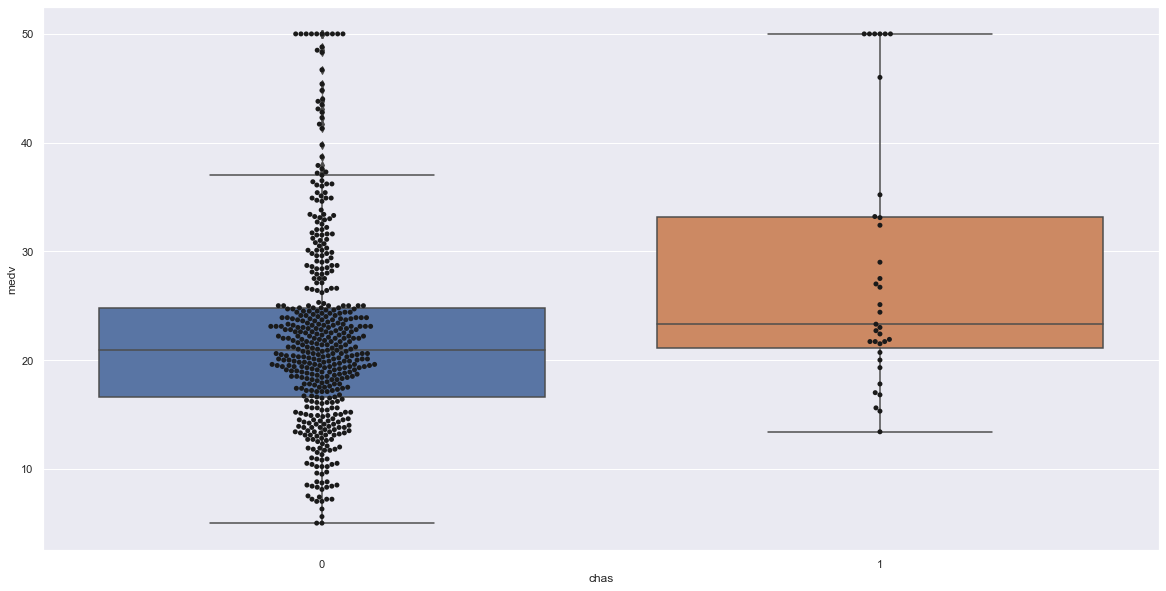

In [22]:
sns.boxplot(x="chas",y="medv",data=df).set(xlabel='Charles River (0 Not on River / 1 on River)', ylabel='Median House Value (000k)')
sns.swarmplot(x="chas",y="medv",data=df,color='k')
plt.show()

## Test using a basic ANOVA set up

A standard T-test is a useful form of inferential statistical analysis, but given the opportunity to use multiple variables a simple T-test has limitations. For this reason we will use an ANOVA to conduct the inferential section of our analysis. 

We will continue to group the locations as CR and NCR. In conducting an ANOVA we will get a Statistic and a P-value.

In [23]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]

In [24]:
stats.f_oneway(CR["medv"], NCR["medv"])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

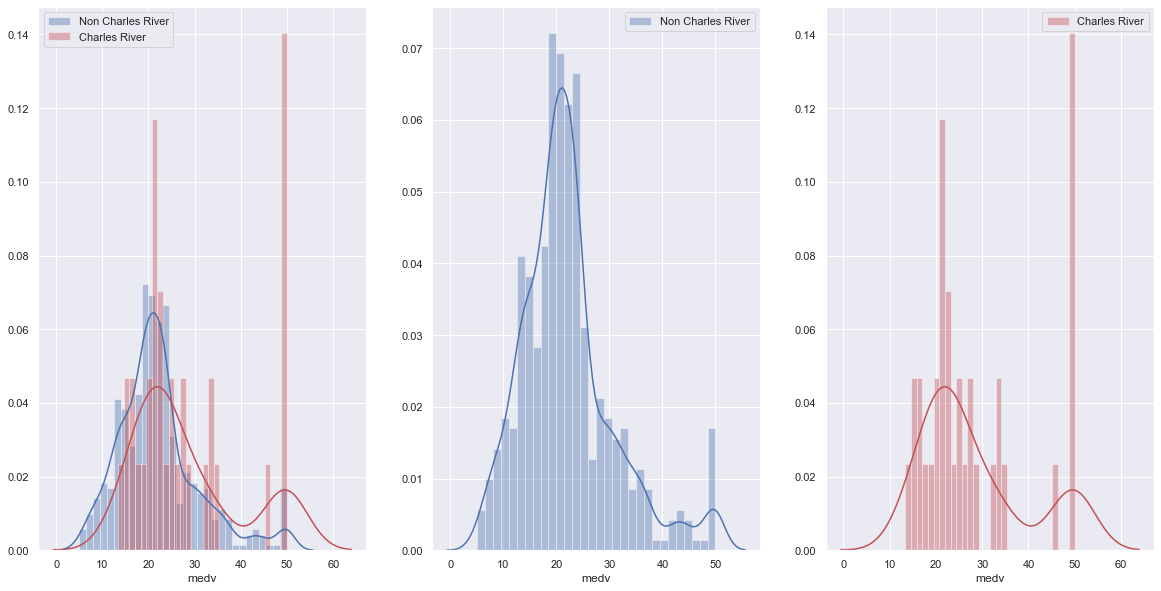

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['medv'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['medv'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['medv'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['medv'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

In [26]:
#stats.f_oneway(df['medv'][df['chas'] == 0],df['medv'][df['chas'] == 1])

In [27]:
#stats.f_oneway(df['medv'][df['chas'] == 0],df['medv'][df['chas'] == 1])

Double checking the ANOVA variance result using a different methodology validates the original findings. 

F-statistic 15.971
P-value 7.390

The null hypothesis in an ANOVA states that there is no signifcant difference between the means of both sets of data. In this case the different sets are those properties situated on the Charles river and those situated away from it.

A large F statistic 

Against NULL
T++ means significant difference, and evidence against null hypothesis
P-- occurs as a result of high T-value given T distribution also a bell curve. So also evidence against null hypothesis.

For NULL
T-- (or closer to 0) more likely there is no significant difference
P++ greater P is closest to the mean and thus represents evidence of there being no statistical difference.

In [28]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]
stats.f_oneway(df['rm'][df['chas'] == 0],df['rm'][df['chas'] == 1])

F_onewayResult(statistic=4.231938627877385, pvalue=0.04018409929586845)

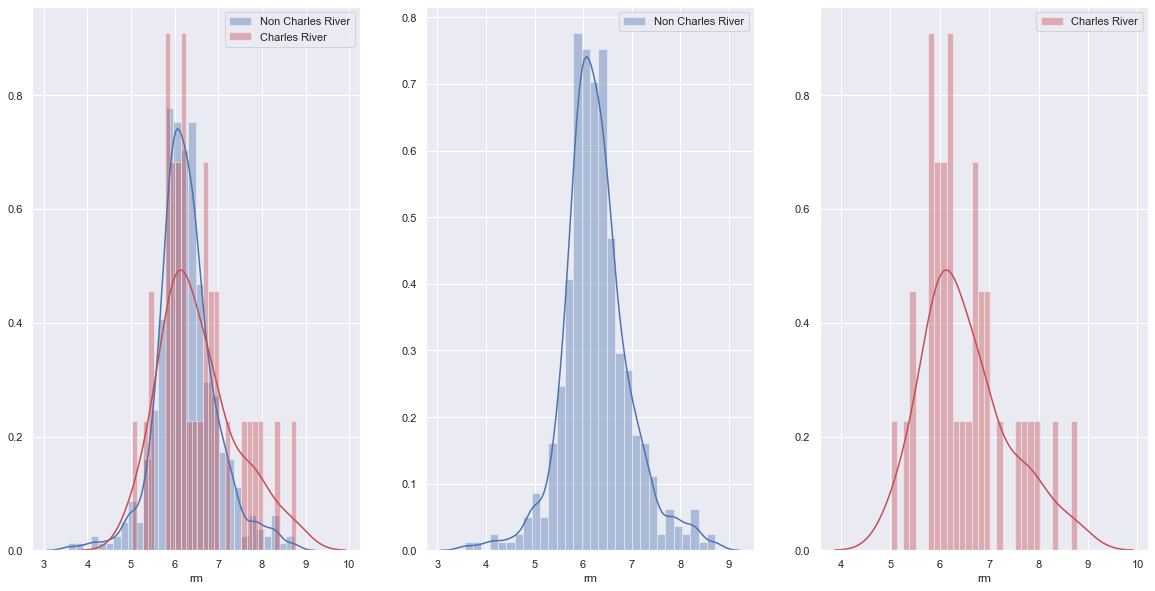

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['rm'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['rm'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['rm'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['rm'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

#plt.hist( NCR ["lstat"], label="Non Charles River")
#plt.hist( CR ["lstat"], label="Charles River")
#plt.legend()
#plt.show()

In [30]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]
stats.f_oneway(df['lstat'][df['chas'] == 0],df['lstat'][df['chas'] == 1])

F_onewayResult(statistic=1.4700936637073991, pvalue=0.22589895344450323)

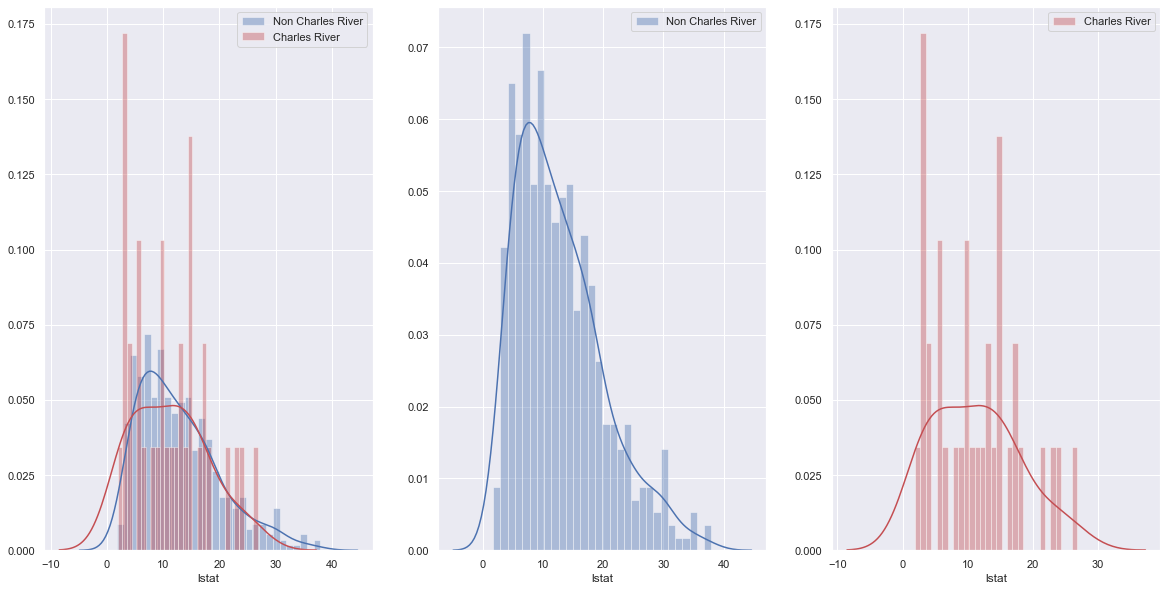

In [31]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['lstat'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['lstat'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['lstat'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['lstat'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

In [32]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]
stats.f_oneway(df['ptratio'][df['chas'] == 0],df['ptratio'][df['chas'] == 1])

F_onewayResult(statistic=7.55356797639744, pvalue=0.006203915968590273)

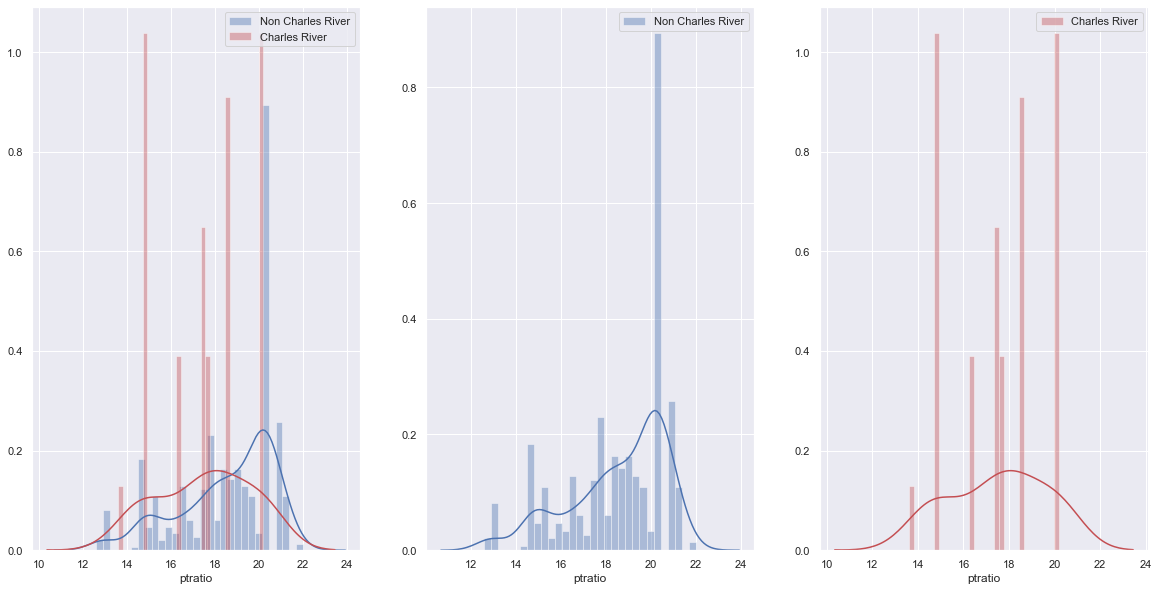

In [33]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['ptratio'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['ptratio'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['ptratio'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['ptratio'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

In [34]:
sns.set(rc={'figure.figsize':(20,10)})
sns.kdeplot(CR["medv"])

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
sns.jointplot(CR['medv'], NCR['medv'])

In [ ]:
x=1
y=2
sns.jointplot(CR['medv'],y)

Importing the Boston House Prices dataset into your Jupyter notebook.

In [ ]:
#test adding columns to the dataset

df["test"] = (df["tax"]*5).astype(np.int)
df

In [ ]:
#print out first 5 ages
output = df["medv"]
output.head(5)

In [ ]:
#assign initial inputs to the neural network - (Lstat, not Istat)
#Not including age
#inputs = df[["crim", "zn", "indus", "chas", "nox", "rm", "dis", "rad", "tax", "ptratio", "b","lstat","medv"]]
#inputs.head(5)

In [ ]:
inputs = df[["rm","lstat","ptratio"]]
inputs.head(5)

In [ ]:
#Set up intial Neural Network
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="linear")) #kernel_initializer="ones", bias_initializer="zeros"))
m.add(kr.layers.Dense(10, activation="linear")) #kernel_initializer="ones", bias_initializer="zeros"))                    
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
m.fit(inputs, output, epochs=10, batch_size=10)

In [ ]:
#Output is set to age
#Prediction of outputs, transpose & round to one decimal place.
#Don't expext any correlation - validated

np.around(m.predict(inputs).T,decimals=1)

In [ ]:
output.as_matrix()

In [ ]:
#Now data is of same dimension
#output.as_matrix() - m.predict(inputs)

#One of them needs to be transposed (.T)
#output.as_matrix() - m.predict(inputs).T

#Sum up the squared losses & take SQRT (mean squared error)

np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

In [ ]:
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="sigmoid")) #kernel_initializer="ones")) #bias_initializer="zeros"))
m.add(kr.layers.Dense(500, activation="sigmoid")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(500, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam") #optimizer updates weights after every iteration

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(inputs, output, epochs=100,batch_size=32)
#epochs too few limits potential of model, too many may over fit to the data. 
#batch size too low patterns less repeating, too high learning slows. Try powers of 2.

#Run each x value through the neural network
prediction = m.predict(inputs)



#Plot the values
#Just plotting p versus y in this instance
plt.plot(inputs, prediction, "r", label="Prediction")
plt.plot(inputs, output, "b", label="Original")



In [ ]:
#mean squared error
np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

In [ ]:
p = prediction.mean()
o = output.mean()

x = np.linspace(0.00, 50, 100)

plt.fill_between(x, p, color='r', alpha=0.25, label='Prediction')
plt.fill_between(x, o, color='b', alpha=0.25, label='Original')

plt.hist(prediction, density=True, color='k', alpha=0.25, label="Prediction")
plt.hist(output, density=True, color='g', alpha=0.25, label="Original")

In [ ]:
#create new neural network
m = kr.models.Sequential()

#add a single neuron in a single layer, initialised with weight 1 and bias 0. 
#Change the first number to add more neurons, input_dim is how many inputs the neural network will take
#kernel initialiser sets weights to 1, biases also set to 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer="ones", bias_initializer="zeros"))

#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
x = np.arange(0.0, 10.0, 1)

#
y = m.predict(x)

In [ ]:
plt.plot(x, y, 'k.')

In [ ]:
#EXAMPLE ONLY hard code the initializers
#create new neural network
m = kr.models.Sequential()

#add a single neuron in a single layer, initialised with weight 1 and bias 0. 
#Change the first number to add more neurons, input_dim is how many inputs the neural network will take
#kernel initialiser sets weights to 1, biases also set to 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer=kr.initializers.Constant(value=2), bias_initializer=kr.initializers.Constant(value=1)))

#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
x = np.arange(0.0, 10.0, 1)

#Now y is x value * 2 (weight) + 1 (bias)
y = m.predict(x)

In [ ]:
plt.plot(x, y, 'r*')

In [ ]:
#EXAMPLE ONLY hard code the initializers
#create new neural network
m = kr.models.Sequential()

#add a new layer with two neurons in a single layer (first layer)
m.add(kr.layers.Dense(2, input_dim=1, activation="linear"))

#add a single neuron in a single layer, initialised with weight 1 and bias 0.
#no input dimension required as it follows on from previous layer and must take 2 inputs
#remember these are weight & bias for (second layer)
m.add(kr.layers.Dense(1, activation="linear", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))
2,3
#set the weight/bias of the two neurons.
#EXAMPLE ONLY we won't use set weights
#bias are b1 -5, b2 -3 ; weights are w11 2, w12 3.
m.layers[0].set_weights([np.matrix([2,3]),np.array([-5,-3])])

#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
x = np.arange(0.0, 10.0, 1)

#Now y is x value * 2 (weight) + 1 (bias)
y = m.predict(x)

In [ ]:
plt.plot(x, y, 'c.')

In [ ]:
#EXAMPLE ONLY hard code the initializers
#create new neural network
m = kr.models.Sequential()



#add a single neuron in a single layer, initialised with weight 1 and bias 0.
#activation function is sigmoid
m.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))


#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
x = np.arange(-10.0, 10.0, 1)

#Now y is x value * 2 (weight) + 1 (bias)
y = m.predict(x)

In [ ]:
plt.plot(x, y, 'y.-')

In [ ]:
x = np.linspace(-10.0,10.0,2000)

y_l = (3.0 * x) + 5.0
y_p = (x * x) - 41.0
y_s = 10.0 * np.sin(2.0 * x)


In [ ]:
plt.plot(x, y_l, label="$3x + 5$")
plt.plot(x, y_p, label="$x^2 - 41$")
plt.plot(x, y_s, label="$10 \sin(2x)$")

plt.legend()

In [ ]:
#y = y_l
#y = y_p
y = y_s

#Create a new neural network
m = kr.models.Sequential()

#Add neurons
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

#Add neurons (changed activation function from tanh to sigmoid)
m.add(kr.layers.Dense(10, input_dim=1, activation="tanh"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))

#compile the model
#learning rate, number associated with the size of the jump its willing to take when it gets something wrong
#Take x, predict y, compare y to what it should have been, now use MSE to calculate how far away you were
#SGD uses the learning rate to jump weights and biases in NN a little in the right direction. next time X gets a closer prediction y.
#Can use ADAM instead of SGD for polynomials
m.compile(loss="mean_squared_error", optimizer="adam")

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(x, y, epochs=15,batch_size=10)

#Run each x value through the neural network
p = m.predict(x)

#Plot the values
#Just plotting p versus y in this instance
plt.plot(x, p, "r-", label="Prediction")
plt.plot(x, y, "k-", label="Original")